# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [1]:
#pip install tensorflow
#pip install matplotlib
#pip install seaborn
#pip install pandas

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from PIL import Image
import random
import os 

2024-04-30 17:08:10.370289: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 17:08:10.370378: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 17:08:10.539023: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Data Preprocessing

### Training Image preprocessing

In [88]:
path = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/"
pathvalid = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/"
classes = os.listdir(path)

In [89]:
directory = path+classes[0]
image_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

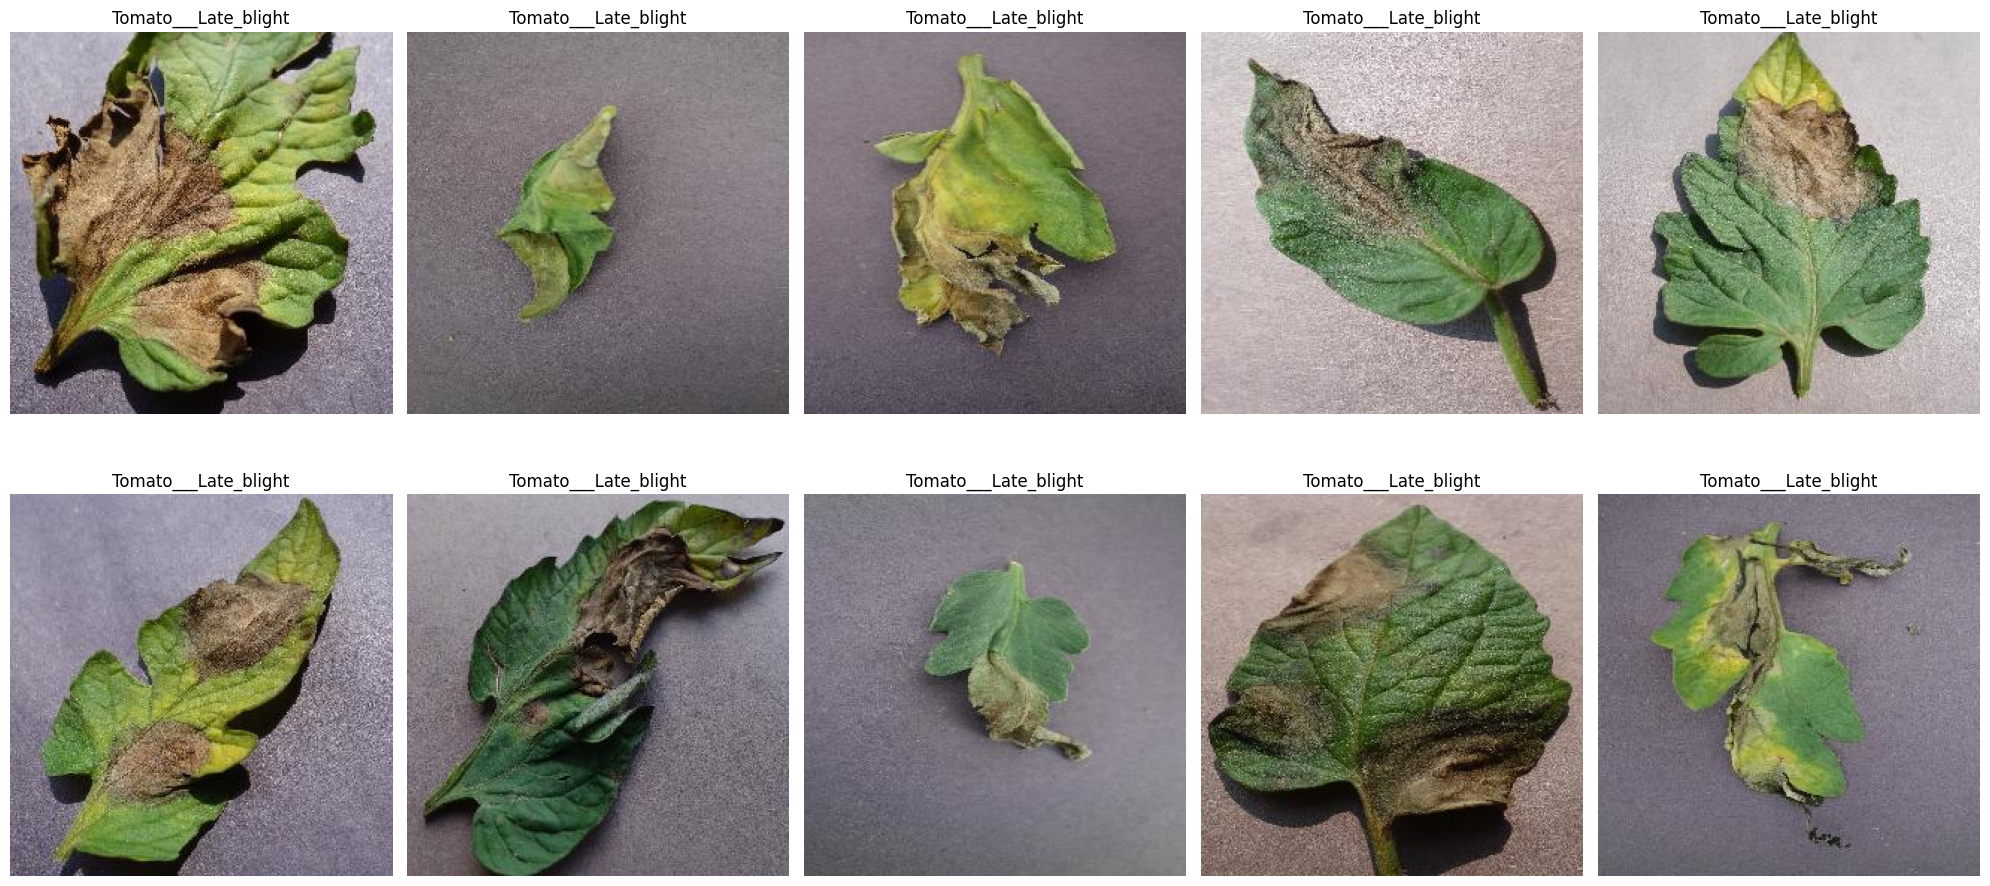

In [90]:
selected_images = random.sample(image_files, 10)
plt.figure(figsize=(20, 10))
for i, image_name in enumerate(selected_images, 1):
    image_path = os.path.join(directory, image_name)
    image = Image.open(image_path)
    plt.subplot(2, 5, i)
    plt.imshow(image)
    plt.axis("off")
    plt.title(classes[0])
plt.tight_layout()
plt.show()

In [63]:
training_set = tf.keras.utils.image_dataset_from_directory(
    path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [65]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    pathvalid,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [66]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [67]:
cnn.add(tf.keras.layers.Input(shape=(128, 128, 3))) 

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))
cnn.add(tf.keras.layers.Dense(units=38, activation='softmax'))

### Compiling and Training Phase

In [68]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [69]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
   3/2197 ━━━━━━━━━━━━━━━━━━━━ 2:17 63ms/step - accuracy: 0.0278 - loss: 5.3874

W0000 00:00:1714502438.980210     193 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4274 - loss: 2.0307

W0000 00:00:1714502547.319290     195 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714502548.560751     193 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 151s 65ms/step - accuracy: 0.4275 - loss: 2.0303 - val_accuracy: 0.8470 - val_loss: 0.4838
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 114s 52ms/step - accuracy: 0.8473 - loss: 0.4787 - val_accuracy: 0.9315 - val_loss: 0.2158
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 115s 52ms/step - accuracy: 0.9078 - loss: 0.2891 - val_accuracy: 0.9310 - val_loss: 0.2131
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 113s 51ms/step - accuracy: 0.9371 - loss: 0.1909 - val_accuracy: 0.9496 - val_loss: 0.1589
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 113s 51ms/step - accuracy: 0.9550 - loss: 0.1372 - val_accuracy: 0.9571 - val_loss: 0.1387
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 112s 51ms/step - accuracy: 0.9627 - loss: 0.1118 - val_accuracy: 0.9408 - val_loss: 0.1925
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 113s 51ms/step - accuracy: 0.9726 - loss: 0.0822 - val_accuracy: 0.9658 - val_loss: 0.1098
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 113s 51ms/step - accuracy: 0.9759 - lo

## Evaluating Model

In [266]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 56s 26ms/step - loss: 0.0783 - accuracy: 0.9782

Training accuracy: 0.9781919121742249


In [267]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 14s 25ms/step - loss: 0.2495 - accuracy: 0.9459

Validation accuracy: 0.9458798170089722


### Saving Model

In [71]:
cnn.save('og_plant_disease_detection.h5')

In [26]:
cnn.save('trained_plant_disease_model.keras')

In [72]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6224197745323181,
  0.865808367729187,
  0.9158830642700195,
  0.9421864748001099,
  0.9561135172843933,
  0.9639376997947693,
  0.9726296067237854,
  0.9766697287559509,
  0.9795718193054199,
  0.9830286502838135],
 'loss': [1.278470516204834,
  0.41907861828804016,
  0.2615705132484436,
  0.17643889784812927,
  0.1337863951921463,
  0.10891219973564148,
  0.08217652887105942,
  0.07257778197526932,
  0.06396899372339249,
  0.05412456393241882],
 'val_accuracy': [0.8470293879508972,
  0.9314818978309631,
  0.9310266375541687,
  0.9495788812637329,
  0.9570908546447754,
  0.9407580494880676,
  0.9657978415489197,
  0.9555543065071106,
  0.9696676731109619,
  0.9631231427192688],
 'val_loss': [0.4838196337223053,
  0.21582843363285065,
  0.21314135193824768,
  0.15892276167869568,
  0.138715460896492,
  0.19249489903450012,
  0.10983321070671082,
  0.15449528396129608,
  0.09521221369504929,
  0.13165754079818726]}

In [28]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [73]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

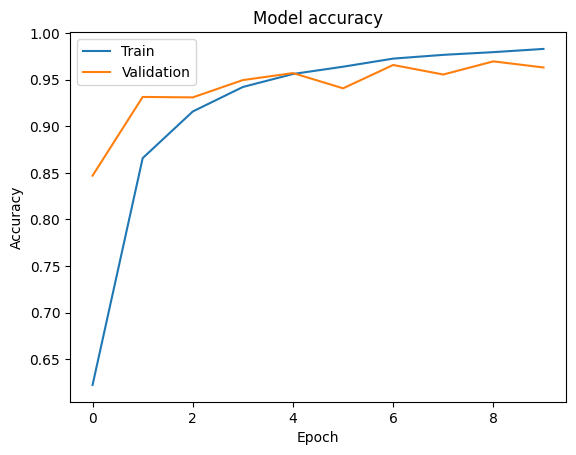

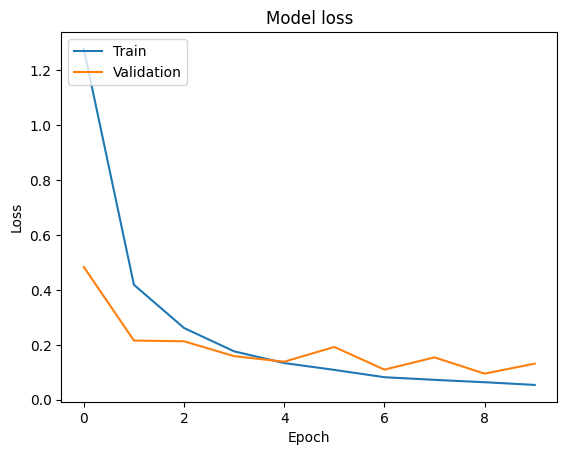

In [74]:
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Some other metrics for model evaluation

In [75]:
class_name = validation_set.class_names

In [76]:
test_set = tf.keras.utils.image_dataset_from_directory(
    pathvalid,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [77]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step


In [78]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [79]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [80]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [81]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [82]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.93      0.96      0.95       504
                                 Apple___Black_rot       0.96      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.92      0.97      0.94       440
                                   Apple___healthy       0.96      0.98      0.97       502
                               Blueberry___healthy       0.98      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      1.00      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.97      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.88      0.91       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.93      0.

### Confusion Matrix Visualization

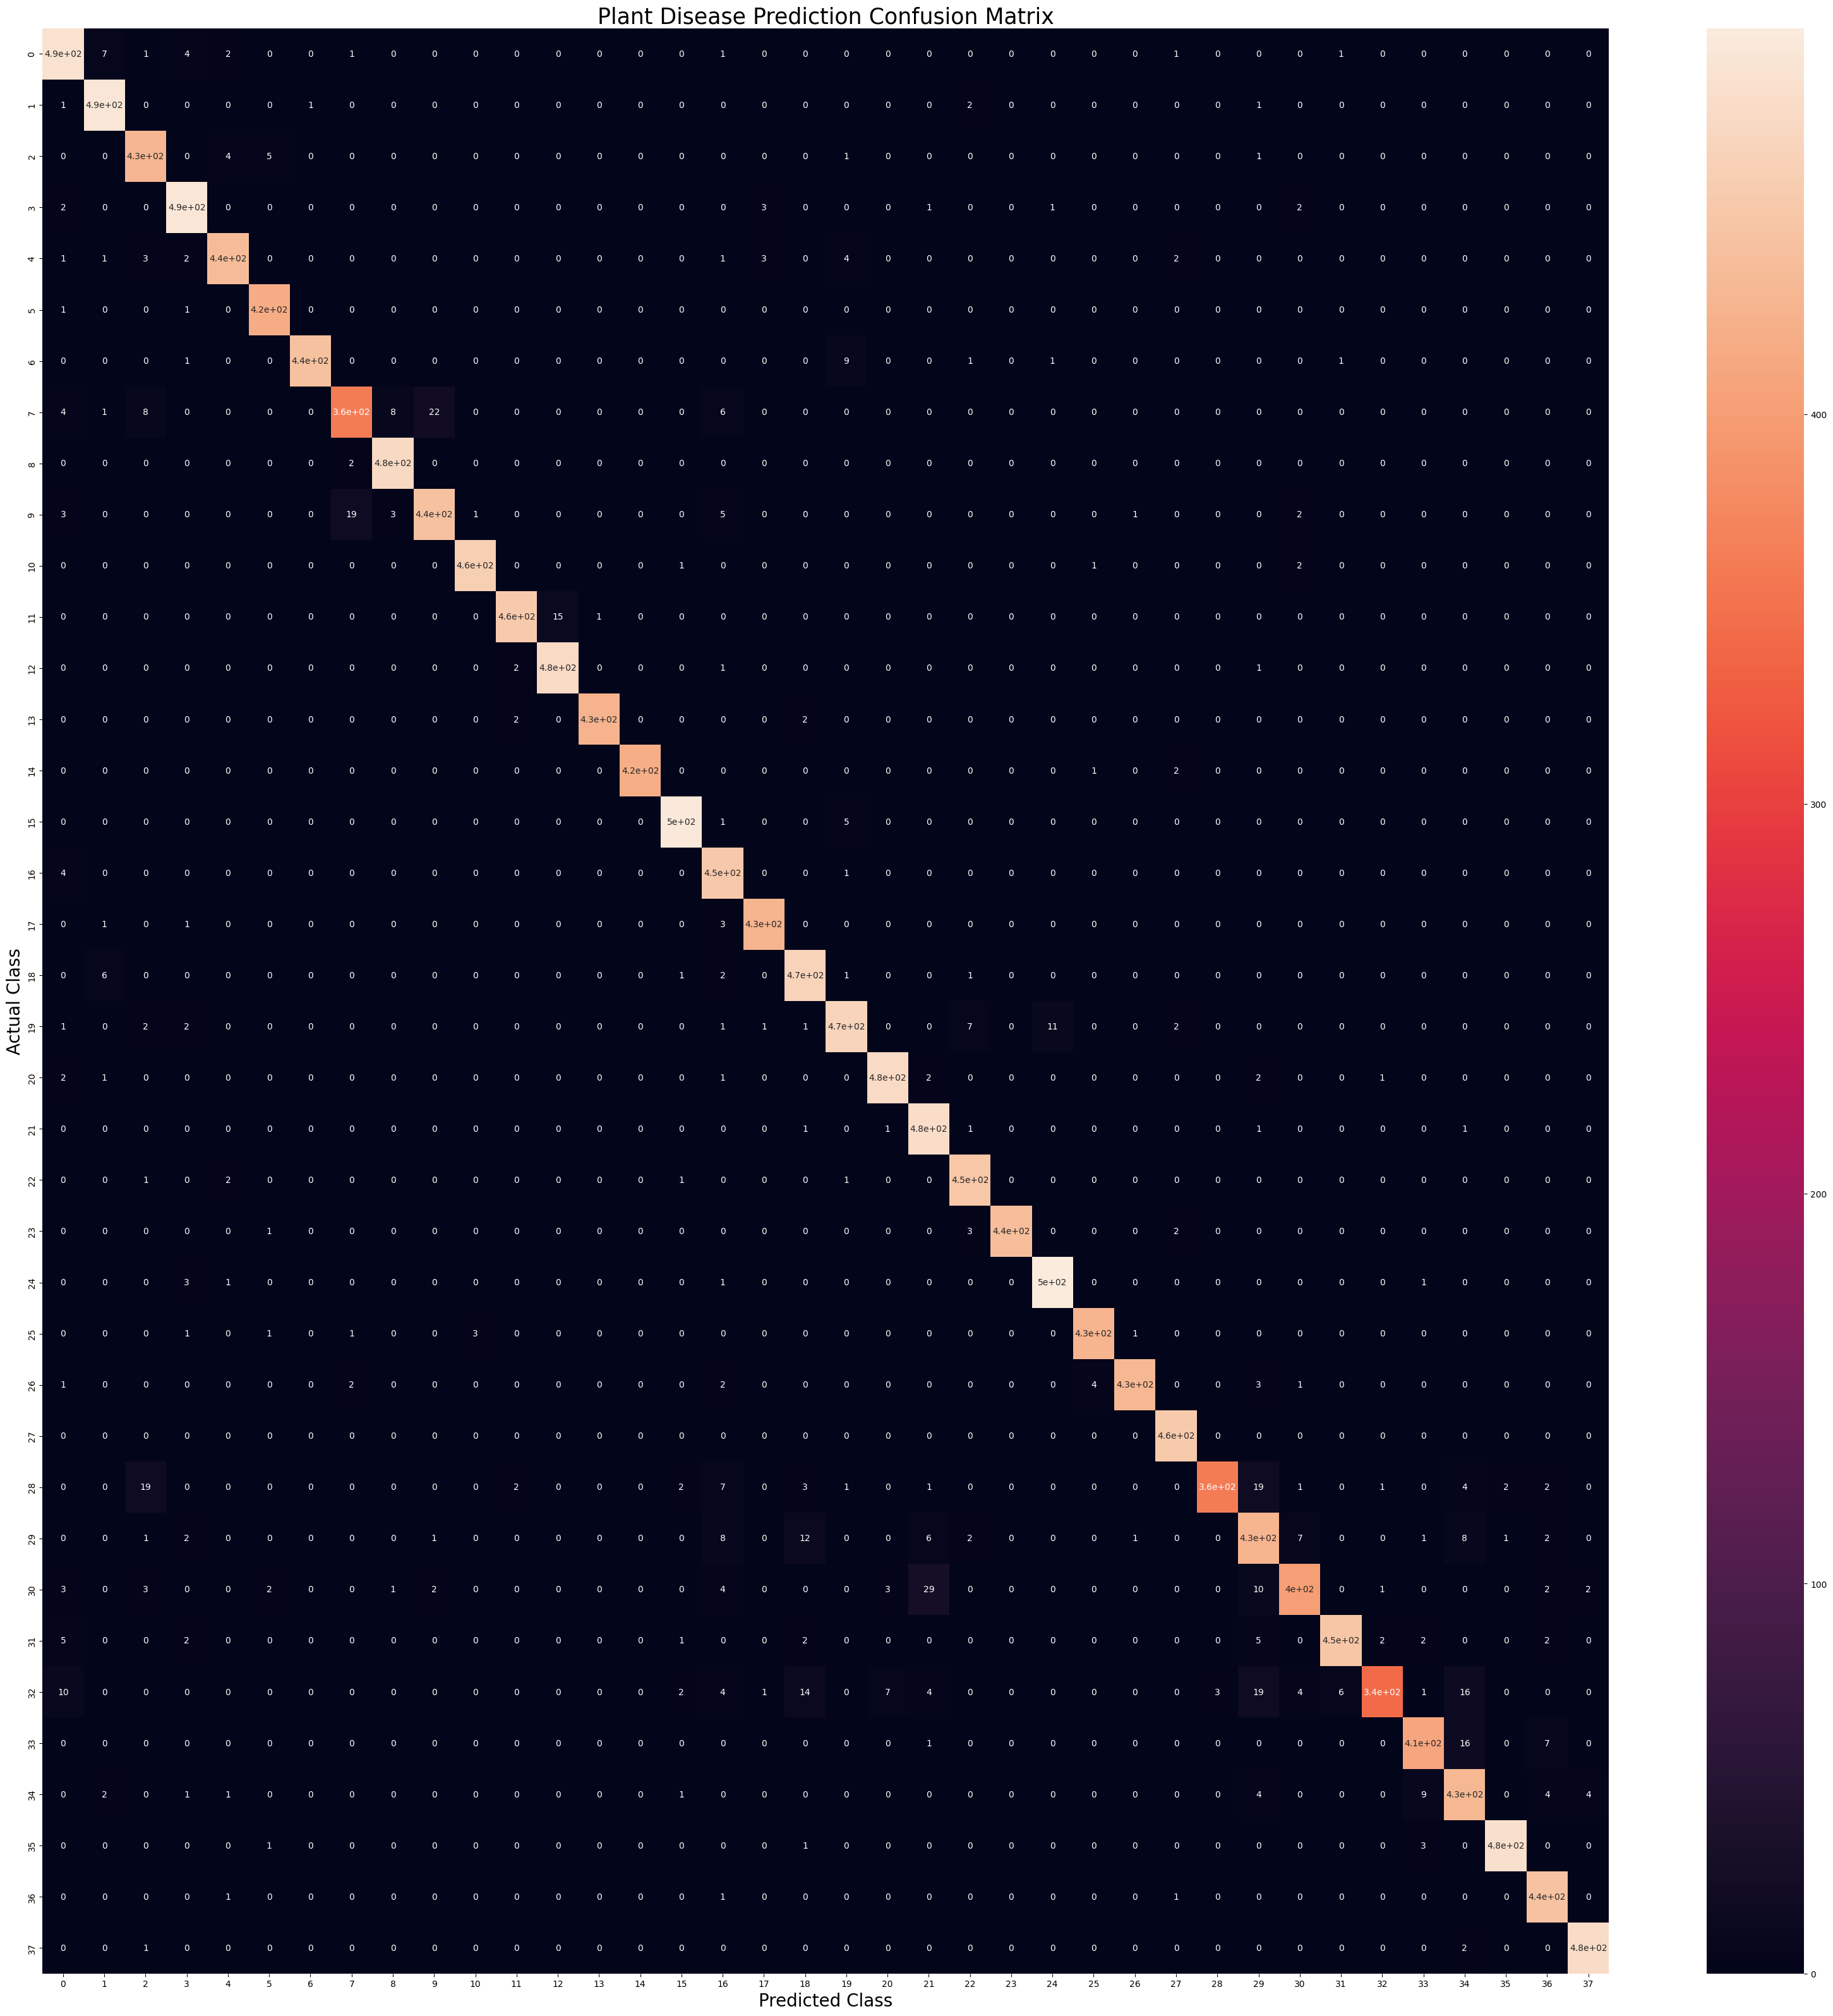

In [83]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()